# 문서 유사도 측정
  - 코사인 유사도
  - 벡터화된 값을 선으로 표시했을 때 기울기 간 차이가 작으면 유사도 높음
  - 기울기 간의 차이가 크면 유사도 낮음, 4분면(음수)일때 처리도 생각해야함

In [2]:
import sklearn, nltk
import numpy as np
# 문장 여러단위면 문장단위 토크나이즈, 다음 단어단위 토크나이즈, 그 다음 품사 태깅
from nltk import sent_tokenize, punkt # 마침표, 개행문자 등의 데이터셋? : punkt

def cosine_similarity(word1, word2) : # 두 개의 매개변수를 갖는 함수 정의 : 코사인 유사도
    words = np.dot(word1, word2) # 곱연산
    # 제곱의 합을 루트씌워서 정규화
    words_norm = (np.sqrt(sum(np.square(word1)))) * np.sqrt(sum(np.square(word2)))
    # 유사도 산출 부분 : 곱연산 수행한 것을 정규화된 값으로 나눠 산출
    similar = words / words_norm
    
    return similar

In [27]:
# 문서를 벡터로 바꾸기 : TfidfVectorizer
# 단어 빈도와 문서 빈도의 역수를 곱한 값 : Tf-Idf
# 단어가 출현한 빈도 * log(1/단어가 출현한 문서의 전체 갯수)
# 카운팅하여 벡터화시키는 방법에서 단어 간 중요도의 차이를 반영
# 의미없는 조사와 같은 단어를 카운팅해주되, 가중치는 조금만 주는 방식
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# 3줄, 1줄에 12개 단어: 조사의 경우 IDF 값 낮아지는지?
# if, a, be..
wordlist = ['if you choose a red one, you will be dead',
           'if you choose a blue one, you will be safe',
           'if you choose a white one, you will be crazy']

# 카운팅해서 벡터화시키는 방법
vectorize =  CountVectorizer()
word_vectorize = vectorize.fit_transform(wordlist)#.toarray()

print(vectorize.vocabulary_) # 각각의 열과 매핑되는 단어 출력
print("\nCountVectorizer : \n{}\n".format(word_vectorize))
############################################################################

# TF-IDF 벡터화
vectorize = TfidfVectorizer()
word_vectorize = vectorize.fit_transform(wordlist)#.toarray() # 단어별 IDF 값

#print(vectorize.vocabulary_) # 각각의 열과 매핑되는 단어 출력
#print(word_vectorize.shape)
print("TF-IDFVectorizer : \n{}".format(word_vectorize))

{'if': 5, 'you': 11, 'choose': 2, 'red': 7, 'one': 6, 'will': 10, 'be': 0, 'dead': 4, 'blue': 1, 'safe': 8, 'white': 9, 'crazy': 3}

CountVectorizer : 
  (0, 4)	1
  (0, 0)	1
  (0, 10)	1
  (0, 6)	1
  (0, 7)	1
  (0, 2)	1
  (0, 11)	2
  (0, 5)	1
  (1, 8)	1
  (1, 1)	1
  (1, 0)	1
  (1, 10)	1
  (1, 6)	1
  (1, 2)	1
  (1, 11)	2
  (1, 5)	1
  (2, 3)	1
  (2, 9)	1
  (2, 0)	1
  (2, 10)	1
  (2, 6)	1
  (2, 2)	1
  (2, 11)	2
  (2, 5)	1

TF-IDFVectorizer : 
  (0, 5)	0.26052362572959153
  (0, 11)	0.5210472514591831
  (0, 2)	0.26052362572959153
  (0, 7)	0.4411048423733124
  (0, 6)	0.26052362572959153
  (0, 10)	0.26052362572959153
  (0, 0)	0.26052362572959153
  (0, 4)	0.4411048423733124
  (1, 5)	0.26052362572959153
  (1, 11)	0.5210472514591831
  (1, 2)	0.26052362572959153
  (1, 6)	0.26052362572959153
  (1, 10)	0.26052362572959153
  (1, 0)	0.26052362572959153
  (1, 1)	0.4411048423733124
  (1, 8)	0.4411048423733124
  (2, 5)	0.26052362572959153
  (2, 11)	0.5210472514591831
  (2, 2)	0.26052362572959153
  (2, 6)

In [21]:
# TF-IDF로 변환하면 Sparse Matrix(희소행렬) = Dense Matrix(밀집행렬)로 변환
# 희소행렬은 대부분의 값이 0 : 저장할 때 효율성이 떨어짐? = 메모리 문제
# 시스템이 약하게 연결되었다고도 표현.. 어쨌든 밀집행렬로 변환하는게 효율성 좋음

vectorize_dense = word_vectorize.todense()

print(vectorize_dense)

[[0.26052363 0.         0.26052363 0.         0.44110484 0.26052363
  0.26052363 0.44110484 0.         0.         0.26052363 0.52104725]
 [0.26052363 0.44110484 0.26052363 0.         0.         0.26052363
  0.26052363 0.         0.44110484 0.         0.26052363 0.52104725]
 [0.26052363 0.         0.26052363 0.44110484 0.         0.26052363
  0.26052363 0.         0.         0.44110484 0.26052363 0.52104725]]


In [38]:
# 리스트의 첫번째/두번째/세번째 문장 벡터값으로 코사인 유사도 산출
# ValueError? shapes (1,12) and (1,12) not aligned: 12 (dim 1) != 1 (dim 0)
# reshape 해주라는것 같은데 (-1, ) 

vectorize_sen1 = np.array(vectorize_dense[0]).reshape(-1,)
vectorize_sen2 = np.array(vectorize_dense[1]).reshape(-1,)
vectorize_sen3 = np.array(vectorize_dense[2]).reshape(-1,)

#vectorize_sen1 

# 함수로 코사인유사도 산출
sen_similar12 = cosine_similarity(vectorize_sen1, vectorize_sen2)
sen_similar13 = cosine_similarity(vectorize_sen1, vectorize_sen3)
sen_similar23 = cosine_similarity(vectorize_sen2, vectorize_sen3)

#sen_similar
# 소수 둘째자리까지만
print("첫번째/두번째 문장 간 코사인 유사도 : {0:.2f}".format(sen_similar12))
print("첫번째/세번째 문장 간 코사인 유사도 : {0:.2f}".format(sen_similar13))
print("두번째/세번째 문장 간 코사인 유사도 : {0:.2f}".format(sen_similar23))

첫번째/두번째 문장 간 코사인 유사도 : 0.61
첫번째/세번째 문장 간 코사인 유사도 : 0.61
두번째/세번째 문장 간 코사인 유사도 : 0.61


# Opinion review 데이터셋 활용 유사도 측정, 시각화
  - 기반 데이터(OpinosisDataset1.0.zip) : https://archive.ics.uci.edu/ml/datasets/Opinosis+Opinion+%26frasl%3B+Review

In [41]:
import pandas as pd
# glob : 파일의 목록을 출력
# os : glob와 같이 사용 - 디렉토리여부 판단? <DIR> 붙여 출력시켜줌
import glob, os, nltk, string
from nltk.stem import WordNetLemmatizer
#TF-IDF 벡터화, Kmeans : K 평균 군집화 모델 - KNN알고리즘(거리기반 판단)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 개행문자, 마침표같은 불필요한거 제거
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer() # lemmatizing

# 함수 두 개 : lemmatizing된 단어 토큰
# 단어 토크나이즈 -> 불필요단어 제거된 거로 변환?

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [42]:
# 파일경로 수동으로 지정 후 다 가져오기 - glob로 파일명, os로 디렉토리여부
path = r'C:\Users\Lim\Desktop\File\OpinosisDataset1.0\OpinosisDataset1.0\topics'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

# 반복문 사용해서 모두 읽기
for file_ in all_files:
    # 인코딩 latin1? 방식, \\ or . 기준으로 쪼개고 리스트에 추가
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 데이터프레임으로 만들기
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})


# TF-IDF 벡터화 수행
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

# knn 알고리즘 사용해서 수행, 군집갯수 3, 최대 반복수 10000?, 시드값? 0
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect) # 모델 훈련

cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

C:\ProgramData\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3_64\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [52]:
from sklearn.metrics.pairwise import cosine_similarity

# 인덱스만 추출 : cluster_label=1 - 호텔로 군집화된 데이터, 
hotel_indexes = document_df[document_df['cluster_label']==1].index

print('"호텔"로 군집화된 문서들의 데이터프레임 인덱스:\n', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']

print('\n---비교 기준 문서 ',comparison_docname,' 와(과) 타 문서 간 유사도---')

#document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출 
#이를 이용하여 호텔로 군집화된 문서 중 가장 첫 문서와 타 문서간의 코사인 유사도 측정하는 부분
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])

print(similarity_pair)

"호텔"로 군집화된 문서들의 데이터프레임 인덱스:
 Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')

---비교 기준 문서  bathroom_bestwestern_hotel_sfo  와(과) 타 문서 간 유사도---
[[1.         0.05907195 0.05404862 0.03739629 0.06629355 0.06734556
  0.04017338 0.13113702 0.41011101 0.3871916  0.57253197 0.10600704
  0.13058128 0.1602411  0.05539602 0.05839754]]


Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

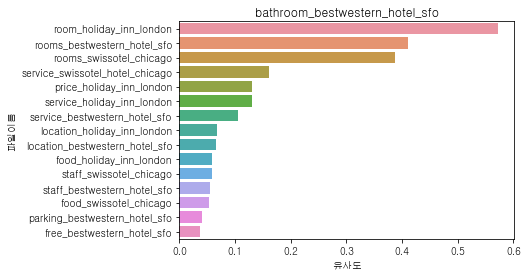

In [60]:
import seaborn as sns # 데이터 분포 시각화 모듈(matplotlib과 유사)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

# 한글폰트 깨짐방지 : 굴림체
font = font_manager.FontProperties(fname = "c:/Windows/Fonts/gulim.ttc").get_name()
rc('font', family = font)

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬. 
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['파일이름'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['유사도'] = hotel_1_sim_value

sns.barplot(x='유사도', y='파일이름',data=hotel_1_sim_df)
plt.title(comparison_docname)